# Udacity Data Analyst Nanodegree -Project "Data Wrangling and Analyzing

# Introduction

Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. 



## Gather

In [2]:
import pandas as pd
import numpy as np
import requests
import os
import time
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
# load the twitter-archive-enhanced.csv into a DataFrame
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
# download the image prediction file from Udacity's server using the requests function
url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_prediction.tsv', mode='wb')as file:
    file.write(response.content)

In [6]:
# load the image predictions data into a DataFrame
image_pred = pd.read_csv('image_prediction.tsv',sep='\t')

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
df_list =[]
with open('tweet-json copy.txt')as file:
    for line in file:
        df_list.append(json.loads(line))

In [8]:
tweet_df = pd.DataFrame(df_list,columns=['id','retweet_count','favorite_count'])

## Assess

# Visual Assessment

In [9]:
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [11]:
tweet_df

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


# Programatic Assesment

In [12]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [102]:
tweet_archive['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
all          1
Dewey        1
Kaiya        1
Butters      1
Stefan       1
Name: name, Length: 957, dtype: int64

In [13]:
tweet_archive['expanded_urls']

0                                                                       https://twitter.com/dog_rates/status/892420643555336193/photo/1
1                                                                       https://twitter.com/dog_rates/status/892177421306343426/photo/1
2                                                                       https://twitter.com/dog_rates/status/891815181378084864/photo/1
3                                                                       https://twitter.com/dog_rates/status/891689557279858688/photo/1
4       https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
                                                                     ...                                                               
2351                                                                    https://twitter.com/dog_rates/status/666049248165822465/photo/1
2352                                            

In [12]:
tweet_archive['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/837820167694528512/photo/1,https://twitter.com/dog_rates/status/837820167694528512/photo/1    2
https://twitter.com/dog_rates/status/767754930266464257/photo/1                                                                    2
https://twitter.com/dog_rates/status/667866724293877760/photo/1                                                                    2
https://twitter.com/dog_rates/status/740676976021798912/photo/1                                                                    2
https://twitter.com/dog_rates/status/676936541936185344/photo/1                                                                    2
                                                                                                                                  ..
https://twitter.com/dog_rates/status/694001791655137281/photo/1,https://twitter.com/dog_rates/status/694001791655137281/photo/1    1
https://twitter.com/dog_rates/status/727524757080539137/photo/1,https

In [51]:
tweet_archive[tweet_archive.text.str.contains( r'(\d+\.\d+)/(\d+)')]

/home/oswafy/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


In [31]:
tweet_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [49]:
tweet_archive.query('rating_denominator > 10').count()

tweet_id                      20
in_reply_to_status_id          4
in_reply_to_user_id            4
timestamp                     20
source                        20
text                          20
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 17
rating_numerator              20
rating_denominator            20
name                          20
doggo                         20
floofer                       20
pupper                        20
puppo                         20
dtype: int64

In [41]:
tweet_archive.query('rating_denominator < 10').count()

tweet_id                      3
in_reply_to_status_id         1
in_reply_to_user_id           1
timestamp                     3
source                        3
text                          3
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 2
rating_numerator              3
rating_denominator            3
name                          3
doggo                         3
floofer                       3
pupper                        3
puppo                         3
dtype: int64

In [13]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Quality Issues

### tweet_archive dataframe

- time_stamp is object not datetime.

- delete retweets.

- tweet_id is int not string.

- Nan values at expanded_urls(tweets with no images)

- 1960 nan values(doggo,floofer,pupper,puppo) 

- tweets with decimal numerator

- outliers rating_denominator

### image_pred dataframe
- create a new dog_type column using the image prediction data
- tweet id is int not string 

## Tidyness Issues

- doggo,floofer,pupper,puppo as multipe columns

- merge the 3 dataframes in 1 dataframe

- drop unessesary columns




## Clean

In [14]:
#make copy to preserve the original data
tweet_archive_clean=tweet_archive.copy()
image_pred_clean=image_pred.copy()


In [48]:
tweet_df_clean=tweet_df.copy()

## Change timestamp to DateTime

#### Code

In [15]:
tweet_archive_clean['timestamp']=pd.to_datetime(tweet_archive_clean['timestamp'])

#### Test

In [16]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

## Change tweet_id to string

### code

In [17]:
tweet_archive_clean['tweet_id'] = tweet_archive_clean['tweet_id'].astype(str)

### Test

In [18]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

## Delete retweets 

## code

In [19]:
tweet_archive_clean=tweet_archive_clean[tweet_archive_clean['retweeted_status_id'].isnull()]

In [20]:
tweet_archive_clean=tweet_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

### Test

In [21]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

## Drop tweets with no image 

## code

In [22]:
tweet_archive_clean=tweet_archive_clean[tweet_archive_clean['expanded_urls'].notnull()]

### Test

In [23]:
len(tweet_archive_clean['expanded_urls'].notnull())

2117

## 1960 nan values(doggo,floofer,pupper,puppo)

### Define
- Extract the dog stage from the text column  

## code

In [24]:
tweet_archive_clean['dog_stage'] = tweet_archive_clean['text'].str.lower().map(lambda x: 
                                                                                        np.NaN if "both" in x 
                                                                                        else "puppo" if "puppo" in x 
                                                                                        else "doggo" if "doggo" in x 
                                                                                        else "pupper" if "pupper" in x 
                                                                                        else "floofer" if "floofer" in x 
                                                                                        else np.NaN)

### Test

In [25]:
tweet_archive_clean['dog_stage'].value_counts()

pupper     240
doggo       81
puppo       30
floofer      9
Name: dog_stage, dtype: int64

## tweets with decimal numerator in text

- Delete tweets with decimal numerator in text

## code

In [26]:
id_list =tweet_archive_clean['tweet_id'][tweet_archive_clean.text.str.contains( r'(\d+\.\d+)/(\d+)')].tolist()
id_list

/home/oswafy/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


['883482846933004288',
 '786709082849828864',
 '778027034220126208',
 '680494726643068929']

In [28]:
tweet_archive_clean=tweet_archive_clean[~tweet_archive_clean.tweet_id.isin(id_list)]

### Test

In [29]:
decimal_check =tweet_archive_clean['tweet_id'][tweet_archive_clean.text.str.contains( r'(\d+\.\d+)/(\d+)')].tolist()
decimal_check

[]

## outliers rating_denominator
- Delete rating dominator >10 and <10 

## code

In [30]:
tweet_archive_clean= tweet_archive_clean[(tweet_archive_clean.rating_denominator ==10)]

### Test

In [31]:
tweet_archive_clean.rating_denominator.value_counts()

10    2095
Name: rating_denominator, dtype: int64

# image_pred dataframe

## tweet_id is int not string 

## code

In [32]:
image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype(str)

### Test

In [33]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## create a new dog_type column using the image prediction data

## code

In [35]:
def dogtype (row):
    if row['p1_dog']:
        return(row['p1'])
    elif row['p2_dog']:
        return(row['p2'])
    elif row['p3_dog']:
        return(row['p3'])
    else:
        return(np.NaN)
    

In [36]:
image_pred_clean['DogType_pred'] = image_pred_clean.apply (lambda row: dogtype (row),axis=1)

In [37]:
def conf (row):
    if row['p1_dog']:
        return(row['p1_conf'])
    elif row['p2_dog']:
        return(row['p2_conf'])
    elif row['p3_dog']:
        return(row['p3_conf'])
    else:
        return(np.NaN)

In [38]:
image_pred_clean['pred_confidence'] = image_pred_clean.apply (lambda row: conf (row),axis=1)

### Test

In [40]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         2075 non-null   object 
 1   jpg_url          2075 non-null   object 
 2   img_num          2075 non-null   int64  
 3   p1               2075 non-null   object 
 4   p1_conf          2075 non-null   float64
 5   p1_dog           2075 non-null   bool   
 6   p2               2075 non-null   object 
 7   p2_conf          2075 non-null   float64
 8   p2_dog           2075 non-null   bool   
 9   p3               2075 non-null   object 
 10  p3_conf          2075 non-null   float64
 11  p3_dog           2075 non-null   bool   
 12  DogType_pred     1751 non-null   object 
 13  pred_confidence  1751 non-null   float64
dtypes: bool(3), float64(4), int64(1), object(6)
memory usage: 184.5+ KB


## Drop (p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,img_num)columns

## code

In [41]:
columns=['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','img_num']
image_pred_clean.drop(columns,axis=1,inplace=True)

### Test

In [42]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         2075 non-null   object 
 1   jpg_url          2075 non-null   object 
 2   DogType_pred     1751 non-null   object 
 3   pred_confidence  1751 non-null   float64
dtypes: float64(1), object(3)
memory usage: 65.0+ KB


# Tidyness Issues 

## drop unnecessary columns tweet_archive_clean

## code

In [43]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2095 non-null   object             
 1   in_reply_to_status_id  22 non-null     float64            
 2   in_reply_to_user_id    22 non-null     float64            
 3   timestamp              2095 non-null   datetime64[ns, UTC]
 4   source                 2095 non-null   object             
 5   text                   2095 non-null   object             
 6   expanded_urls          2095 non-null   object             
 7   rating_numerator       2095 non-null   int64              
 8   rating_denominator     2095 non-null   int64              
 9   name                   2095 non-null   object             
 10  doggo                  2095 non-null   object             
 11  floofer                2095 non-null   object           

In [44]:
tweet_archive_clean=tweet_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id', 'doggo','floofer','pupper','puppo'], axis=1)

### Test

In [45]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2095 non-null   object             
 1   timestamp           2095 non-null   datetime64[ns, UTC]
 2   source              2095 non-null   object             
 3   text                2095 non-null   object             
 4   expanded_urls       2095 non-null   object             
 5   rating_numerator    2095 non-null   int64              
 6   rating_denominator  2095 non-null   int64              
 7   name                2095 non-null   object             
 8   dog_stage           350 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 163.7+ KB


# merge the 3 dataframes in 1 dataframe

In [50]:
tweet_df_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

In [51]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [55]:
tweet_df_clean['tweet_id'] = tweet_df_clean['tweet_id'].astype(str)

In [56]:
master_df = pd.merge(tweet_archive_clean, image_pred_clean, on="tweet_id")
master_clean = pd.merge(master_df, tweet_df_clean, on="tweet_id")

In [58]:
master_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,DogType_pred,pred_confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,41,111
1968,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,147,311
1969,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,47,128
1970,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.

# Save DataFrames

In [59]:
master_clean.to_csv('twitter_archive_master.csv',index=False)

# Analyzing, and Visualizing 

In [60]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1972 entries, 0 to 1971
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1972 non-null   object             
 1   timestamp           1972 non-null   datetime64[ns, UTC]
 2   source              1972 non-null   object             
 3   text                1972 non-null   object             
 4   expanded_urls       1972 non-null   object             
 5   rating_numerator    1972 non-null   int64              
 6   rating_denominator  1972 non-null   int64              
 7   name                1972 non-null   object             
 8   dog_stage           317 non-null    object             
 9   jpg_url             1972 non-null   object             
 10  DogType_pred        1665 non-null   object             
 11  pred_confidence     1665 non-null   float64            
 12  retweet_count       1972 non-null 

## what is the most common dog type?

In [61]:
master_clean['DogType_pred'].value_counts()

golden_retriever      153
Labrador_retriever    105
Pembroke               95
Chihuahua              90
pug                    62
                     ... 
EntleBucher             1
Japanese_spaniel        1
silky_terrier           1
standard_schnauzer      1
Scotch_terrier          1
Name: DogType_pred, Length: 112, dtype: int64

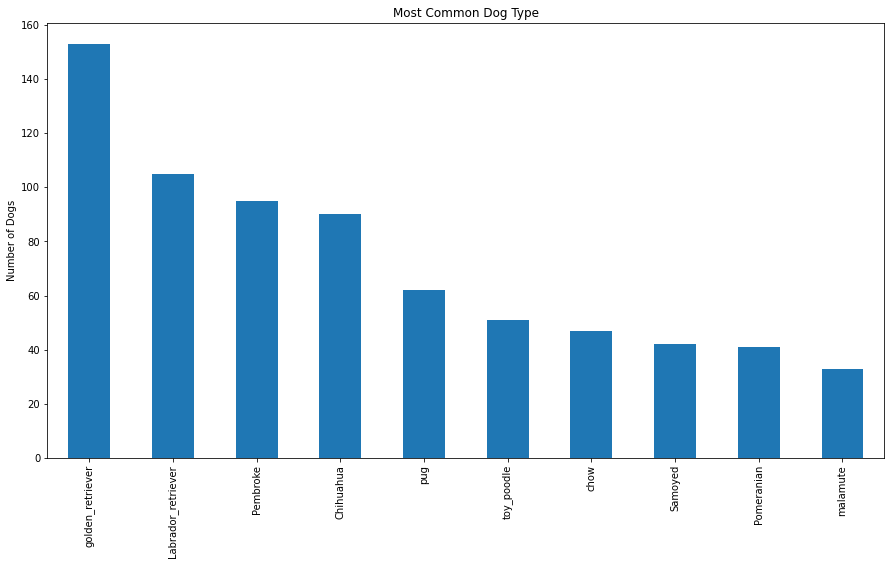

In [93]:
master_clean['DogType_pred'].value_counts()[0:10].plot(kind='bar', figsize=(15,8), title='Most Common Dog Type').set_ylabel("Number of Dogs");

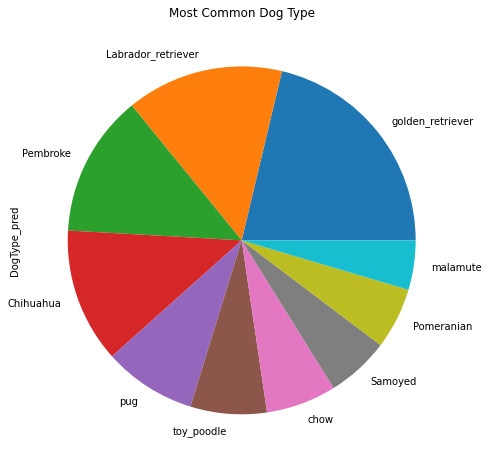

In [105]:
master_clean['DogType_pred'].value_counts()[0:10].plot(kind='pie', figsize=(15,8), title='Most Common Dog Type');

### The most common Dog type is golden retriever

## which dog type get the highest rating numerator ?

In [86]:
hr = master_clean.groupby('DogType_pred')['rating_numerator'].mean()
hr1=hr.sort_values(ascending = False).head(10)
hr1s

DogType_pred
Bouvier_des_Flandres    13.000000
Saluki                  12.500000
briard                  12.333333
Tibetan_mastiff         12.250000
Border_terrier          12.142857
standard_schnauzer      12.000000
silky_terrier           12.000000
Irish_setter            11.750000
Gordon_setter           11.750000
Samoyed                 11.690476
Name: rating_numerator, dtype: float64

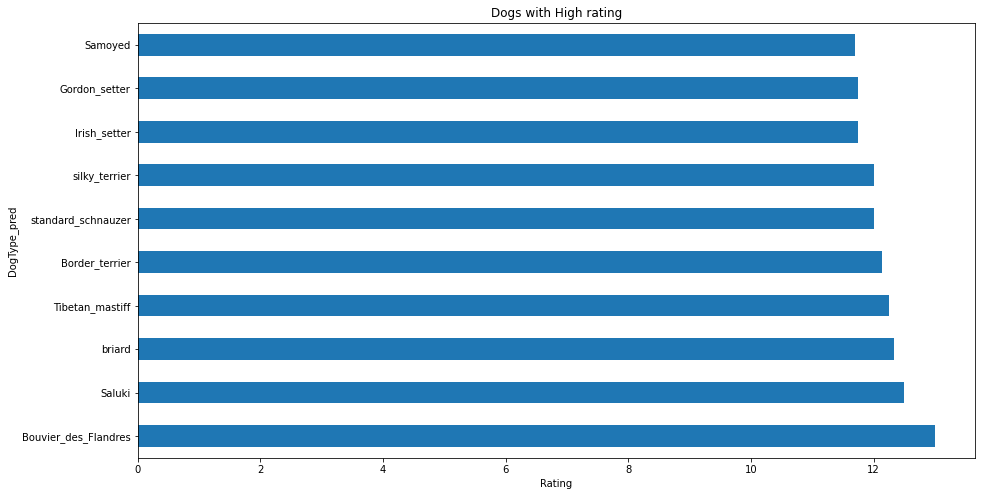

In [104]:
hr1.plot(kind='barh', figsize=(15,8), title='Dogs with High rating').set_xlabel("Rating");

## Bouvier des Flandres is the type with highest rating

## which dog stage get the highest rating numerator ?

In [87]:
hr_stage = master_clean.groupby('dog_stage')['rating_numerator'].mean()
hr2=hr_stage.sort_values(ascending = False).head(10)
hr2

dog_stage
puppo      12.172414
floofer    12.000000
doggo      11.652174
pupper     10.566038
Name: rating_numerator, dtype: float64

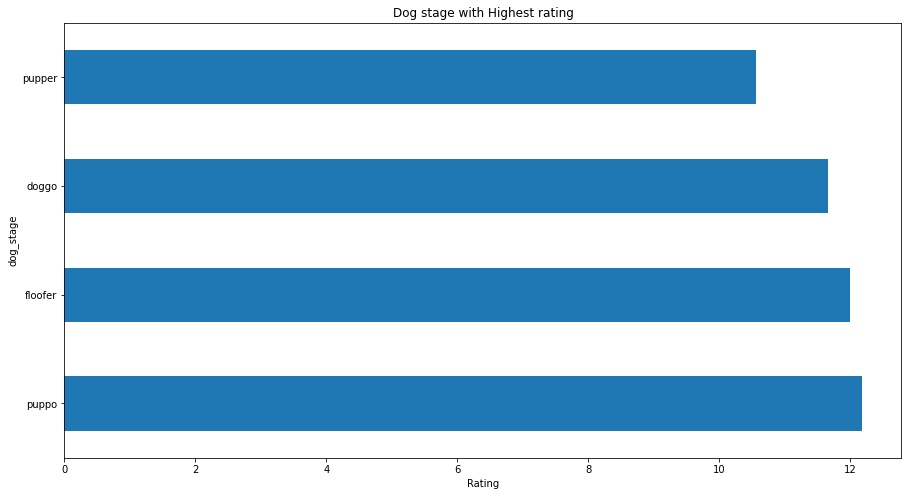

In [88]:
hr2.plot(kind='barh', figsize=(15,8), title='Dog stage with Highest rating').set_xlabel("Rating");

## Puppo gets the highest rating

## How many dogs got rate below 10 ?

In [101]:
len(master_clean.query('rating_numerator <10'))

409

# 409 Dogs rated below 10